In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv("data/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
print(movies_df.size)
print(movies_df.shape)

27375
(9125, 3)


In [4]:
ratings_df = pd.read_csv("data/ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
print(ratings_df.size)
print(ratings_df.shape)

400016
(100004, 4)


<h1>How many user ratings do you have? How many movies?</h1>
<p>There are 100004 ratings and 9125 moives in my dataset</p>

<h2>Useful functions</h2>

In [6]:
from scipy.sparse import csr_matrix

def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)

In [8]:
avg_ratings_df = get_genre_ratings(ratings_df, movies_df, ['Romance','Sci-Fi'], ['avg_romance_rating','avg_scifi_rating'])
avg_ratings_df.head()

,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [9]:
print(avg_ratings_df.size)
print(avg_ratings_df.shape)

1342
(671, 2)


<h1>How many users are there?</h1>
<p>There are 671 users</p>

In [10]:
avg_ratings_df = avg_ratings_df.dropna()
print(avg_ratings_df.size)
print(avg_ratings_df.shape)

1320
(660, 2)


In [11]:
X=avg_ratings_df.to_numpy()
print(X[:5])

[[3.5  2.4 ]
 [3.59 3.8 ]
 [3.65 3.14]
 [4.5  4.26]
 [4.08 4.  ]]


In [12]:
from sklearn.cluster import KMeans

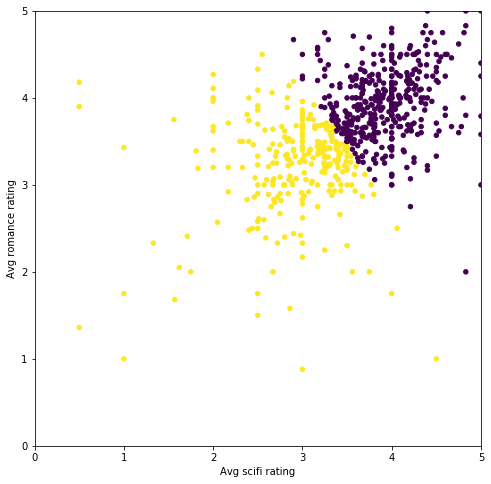

In [13]:
kmeans = KMeans(n_clusters=2, random_state=171578).fit(X)
y_pred=kmeans.predict(X)
draw_clusters(avg_ratings_df,y_pred)

<h1>Comment on the Seperation</h1>
<p>Since there is such a clear serpation I believe the model has overfit the data</p>

<h1>The Reccomender</h1>

In [14]:
reccomended_df = ratings_df.merge(movies_df[['movieId','title']], on='movieId')
reccomended_df.head()

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds (1995)
1,7,31,3.0,851868750,Dangerous Minds (1995)
2,31,31,4.0,1273541953,Dangerous Minds (1995)
3,32,31,4.0,834828440,Dangerous Minds (1995)
4,36,31,3.0,847057202,Dangerous Minds (1995)


In [15]:
reccomended_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
dtype: object

In [16]:
table = pd.pivot_table(reccomended_df, values='rating', index=['userId'],columns=['title'])

In [17]:
table.head(10)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
top_moives = get_most_rated_movies(table,1000)
top_moives.head()

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(pd.SparseDataFrame(top_moives).to_coo())
print(sparse_matrix[1])

  (0, 0)	3.0
  (0, 1)	4.0
  (0, 3)	3.0
  (0, 5)	4.0
  (0, 8)	4.0
  (0, 9)	5.0
  (0, 11)	4.0
  (0, 18)	3.0
  (0, 19)	3.0
  (0, 20)	5.0
  (0, 22)	4.0
  (0, 23)	4.0
  (0, 24)	3.0
  (0, 27)	5.0
  (0, 30)	5.0
  (0, 35)	3.0
  (0, 48)	3.0
  (0, 50)	4.0
  (0, 62)	3.0
  (0, 76)	4.0
  (0, 77)	3.0
  (0, 82)	3.0
  (0, 85)	3.0
  (0, 87)	4.0
  (0, 93)	3.0
  :	:
  (0, 250)	5.0
  (0, 253)	3.0
  (0, 269)	4.0
  (0, 270)	2.0
  (0, 286)	2.0
  (0, 327)	5.0
  (0, 341)	3.0
  (0, 398)	3.0
  (0, 406)	4.0
  (0, 408)	3.0
  (0, 428)	3.0
  (0, 430)	4.0
  (0, 449)	3.0
  (0, 480)	3.0
  (0, 511)	4.0
  (0, 515)	4.0
  (0, 564)	3.0
  (0, 578)	3.0
  (0, 594)	5.0
  (0, 618)	3.0
  (0, 638)	1.0
  (0, 725)	3.0
  (0, 763)	4.0
  (0, 923)	4.0
  (0, 986)	3.0


In [130]:
y_pred = KMeans(n_clusters=20, random_state=171578).fit_predict(sparse_matrix)
y_pred[:5]

array([ 5,  1,  5,  7, 18])

In [131]:
clustered = pd.concat([top_moives.reset_index(), pd.DataFrame(data={'group':y_pred})], axis=1)
clustered.head()

,index,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),...,What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006),group
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,1,3.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,5.0,4.5,5.0,3.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,3,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18


In [151]:
cluster = clustered[clustered.group == 9].drop(
['index', 'group'], axis=1)
cluster.head()

,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
291,5.0,5.0,5.0,4.5,4.5,3.5,4.0,4.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,3.0,4.0,4.5,4.0,4.0,NaN,4.5,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,3.0,4.5,NaN,NaN,4.5,3.5,4.0,NaN,3.0,5.0,...,1.5,3.5,NaN,NaN,NaN,4.0,3.0,NaN,NaN,4.5
393,NaN,4.5,3.0,NaN,3.0,NaN,5.0,NaN,0.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.5,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
cluster['Pulp Fiction (1994)'].mean()

4.666666666666667

In [163]:
user=291
user_ratings_df=cluster.loc[[user]]
user_ratings_df.head()

,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
291,5.0,5.0,5.0,4.5,4.5,3.5,4.0,4.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
user_291_unrated=pd.DataFrame(columns = user_ratings_df.columns[user_ratings_df.isna().any()])
user_291_unrated.head()

,Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Star Wars: Episode VI - Return of the Jedi (1983),Ace Ventura: Pet Detective (1994),E.T. the Extra-Terrestrial (1982),"Terminator, The (1984)",Die Hard (1988),Babe (1995),Ghostbusters (a.k.a. Ghost Busters) (1984),Blade Runner (1982),Stargate (1994),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)


In [215]:
cluster_mean_df= pd.DataFrame(cluster.mean().to_numpy().reshape(1,1000),columns=cluster.columns)
cluster_mean_df.head()

,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,3.9,4.666667,4.5,4.5,4.166667,3.875,4.333333,4.166667,3.3,4.2,...,1.5,3.5,NaN,NaN,NaN,4.0,3.0,NaN,NaN,3.75


In [217]:
avg_ratings= pd.concat([user_291_unrated,cluster_mean_df],join='inner')
avg_ratings.head()

,Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Star Wars: Episode VI - Return of the Jedi (1983),Ace Ventura: Pet Detective (1994),E.T. the Extra-Terrestrial (1982),"Terminator, The (1984)",Die Hard (1988),Babe (1995),Ghostbusters (a.k.a. Ghost Busters) (1984),Blade Runner (1982),Stargate (1994),...,Insomnia (2002),What Lies Beneath (2000),Roman Holiday (1953),"Motorcycle Diaries, The (Diarios de motocicleta) (2004)",Sophie's Choice (1982),Dawn of the Dead (2004),Ocean's Thirteen (2007),Seabiscuit (2003),Easy Rider (1969),Lucky Number Slevin (2006)
0,4.1,4.125,2.625,4.0,3.6,4.0,3.5,4.0,4.0,2.75,...,1.5,3.5,NaN,NaN,NaN,4.0,3.0,NaN,NaN,3.75


In [226]:
avg_ratings.loc[0].nlargest(20)

Taxi Driver (1976)                                                           5.00
Army of Darkness (1993)                                                      5.00
Monty Python and the Holy Grail (1975)                                       4.75
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)               4.75
Dead Poets Society (1989)                                                    4.75
One Flew Over the Cuckoo's Nest (1975)                                       4.50
Clockwork Orange, A (1971)                                                   4.50
Stand by Me (1986)                                                           4.50
Inception (2010)                                                             4.50
Heat (1995)                                                                  4.50
Amadeus (1984)                                                               4.50
Fish Called Wanda, A (1988)                                                  4.50
Little Miss Suns

In [270]:
def give_recommendations(user_id,users_table,num_of_recommendations):
    cluster_num=users_table.loc[user_id].group
    print(cluster_num)
    cluster=clustered[clustered.group == cluster_num].drop(['index', 'group'], axis=1)
    user_rated=cluster.loc[[user_id]]
    user_unrated=pd.DataFrame(columns = user_rated.columns[user_rated.isna().any()])
    cluster_mean_df= pd.DataFrame(cluster.mean().to_numpy().reshape(1,1000),columns=cluster.columns)
    avg_ratings= pd.concat([user_unrated,cluster_mean_df],join='inner')
    print(avg_ratings.loc[0].nlargest(num_of_recommendations))

In [275]:
give_recommendations(291,clustered,20)

9.0
Taxi Driver (1976)                                                           5.00
Army of Darkness (1993)                                                      5.00
Monty Python and the Holy Grail (1975)                                       4.75
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)               4.75
Dead Poets Society (1989)                                                    4.75
One Flew Over the Cuckoo's Nest (1975)                                       4.50
Clockwork Orange, A (1971)                                                   4.50
Stand by Me (1986)                                                           4.50
Inception (2010)                                                             4.50
Heat (1995)                                                                  4.50
Amadeus (1984)                                                               4.50
Fish Called Wanda, A (1988)                                                  4.50
Little Miss 

<h1>Pokemon classifier</h1>

In [53]:
pokemon_dataset = pd.read_csv("data/PokemonDataSet.csv")
pokemon_dataset.head()

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [54]:
pokemon_dataset.describe()

,ID,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.0000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [32]:
pokemon_gen8=pd.read_csv("data/PokemonGen8.csv")
pokemon_gen8.head()

,No.,Name,Ability1,Ability2,Hidden_Ability,Type1,Type2,HP,Att,Def,...,S.Def,Spd,Weight_kg,Height_m,Weight_lbs,Height_ft,Cap_Rate,Egg_Steps,Classification,Legendary
0,1,Grookey,Overgrow,NaN,Grassy Surge,grass,NaN,50,65,50,...,40,65,5.0,0.3,11.0,1.000,45,5120,Chimp Pokémon,0
1,2,Thwackey,Overgrow,NaN,Grassy Surge,grass,NaN,70,85,70,...,60,80,14.0,0.7,30.9,2.333,45,5120,Beat Pokémon,0
2,3,Rillaboom,Overgrow,NaN,Grassy Surge,grass,NaN,100,125,90,...,70,85,90.0,2.1,198.4,6.917,45,5120,Drummer Pokémon,0
3,4,Scorbunny,Blaze,NaN,Libero,fire,NaN,50,71,40,...,40,69,4.5,0.3,9.9,1.000,45,5120,Rabbit Pokémon,0
4,5,Raboot,Blaze,NaN,Libero,fire,NaN,65,86,60,...,60,94,9.0,0.6,19.8,2.000,45,5120,Rabbit Pokémon,0


In [105]:
X_test=pokemon_gen8[['HP','Att','Def','S.Att','S.Def','Spd']].to_numpy()
y_test=pokemon_gen8['Legendary'].to_numpy()
print(X_test.size)
print(X_test.shape)
print(y_test.size)
print(y_test.shape)

2400
(400, 6)
400
(400,)


In [34]:
X=pokemon_dataset[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']].to_numpy()
print(X[:5])
print(X.shape)
print(X.size)

[[ 45  49  49  65  65  45]
 [ 60  62  63  80  80  60]
 [ 80  82  83 100 100  80]
 [ 80 100 123 122 120  80]
 [ 39  52  43  60  50  65]]
(800, 6)
4800


In [35]:
y=pokemon_dataset['Legendary'].to_numpy()
print(y[:5])
print(y.shape)
print(y.size)

[False False False False False]
(800,)
800


In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['lbfgs'], 'max_iter': [5000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(2,5,8),(1,4,7),(3,6,9)], 'random_state':[171578]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X, y)
print(clf.score(X, y))
print(clf.best_estimator_)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.915
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 4, 7), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=171578, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


D:\Python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
mlp_classifier=MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 4, 7), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=171578, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
mlp_classifier.fit(X,y)
y_train_pred=mlp_classifier.predict(X)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y, y_train_pred)
cm

array([[731,   4],
       [ 64,   1]], dtype=int64)

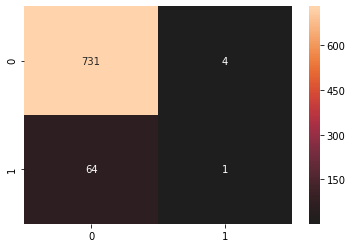

In [113]:
import seaborn as sns
sns.heatmap(cm, center=True,annot=True,fmt="d")
plt.show()

In [97]:
for i in range(len(y_train_pred)):
    if(pokemon_dataset.loc[i].Legendary==True and y_train_pred[i]==False):
        print(pokemon_dataset.loc[i])

ID                 157
Name          Articuno
Type_1             Ice
Type_2          Flying
Total              580
HP                  90
Attack              85
Defense            100
Sp_Atk              95
Sp_Def             125
Speed               85
Generation           1
Legendary         True
Name: 156, dtype: object
ID                 158
Name            Zapdos
Type_1        Electric
Type_2          Flying
Total              580
HP                  90
Attack              90
Defense             85
Sp_Atk             125
Sp_Def              90
Speed              100
Generation           1
Legendary         True
Name: 157, dtype: object
ID                159
Name          Moltres
Type_1           Fire
Type_2         Flying
Total             580
HP                 90
Attack            100
Defense            90
Sp_Atk            125
Sp_Def             85
Speed              90
Generation          1
Legendary        True
Name: 158, dtype: object
ID                163
Name           Mewt

In [99]:
for i in range(len(y_train_pred)):
    if(pokemon_dataset.loc[i].Legendary==True and y_train_pred[i]==True):
        print(pokemon_dataset.loc[i])

ID                 415
Name          Regirock
Type_1            Rock
Type_2             NaN
Total              580
HP                  80
Attack             100
Defense            200
Sp_Atk              50
Sp_Def             100
Speed               50
Generation           3
Legendary         True
Name: 414, dtype: object


In [277]:
for i in range(len(y_train_pred)):
    if(pokemon_dataset.loc[i].Legendary==False and y_train_pred[i]==True):
        print(pokemon_dataset.loc[i])

ID                            225
Name          SteelixMega Steelix
Type_1                      Steel
Type_2                     Ground
Total                         610
HP                             75
Attack                        125
Defense                       230
Sp_Atk                         55
Sp_Def                         95
Speed                          30
Generation                      2
Legendary                   False
Name: 224, dtype: object
ID                                269
Name          TyranitarMega Tyranitar
Type_1                           Rock
Type_2                           Dark
Total                             700
HP                                100
Attack                            164
Defense                           150
Sp_Atk                             95
Sp_Def                            120
Speed                              71
Generation                          2
Legendary                       False
Name: 268, dtype: object
ID            

In [107]:
y_test_pred=mlp_classifier.predict(X_test)
mlp_classifier.score(X_test,y_test)

0.9925

In [108]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[397,   0],
       [  3,   0]], dtype=int64)

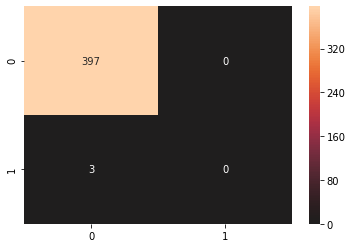

In [114]:
sns.heatmap(cm_test, center=True,annot=True,fmt="d")
plt.show()

<h1>Does it correctly predict Zacian, Zamazenta and Eternatus as the only Legendaries in the Gen 8 list?</h1>
<p>No it did not predict Zacian, Zamazenta and Eternatus as the only Legendaries as it incorrectly predicted than none of the pokemon were Legendary. The classifier seemed to pick pokemon with high defense and low special atk and speed.</p

<h1>SVC Solution</h1>

In [115]:
from sklearn.svm import SVC

In [119]:
param_grid = {
    'C': [0.1,1,10,100],
    'kernel': ['linear']
    }
search = GridSearchCV(SVC(), param_grid,n_jobs=-1)
search.fit(X,y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.930):
{'C': 0.1, 'kernel': 'linear'}


In [121]:
svc_classifier=SVC(C=0.1,kernel='linear')
svc_classifier.fit(X,y)
svc_classifier.score(X,y)

0.94125

In [122]:
svc_pred = svc_classifier.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_pred)
svc_cm

array([[397,   0],
       [  0,   3]], dtype=int64)

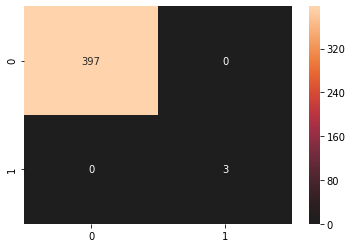

In [123]:
sns.heatmap(svc_cm, center=True,annot=True,fmt="d")
plt.show()

In [124]:
for i in range(len(svc_pred)):
    if(pokemon_gen8.loc[i].Legendary==True and svc_pred[i]==True):
        print(pokemon_gen8.loc[i])

No.                           398
Name                       Zacian
Ability1           Intrepid Sword
Ability2                      NaN
Hidden_Ability                NaN
Type1                       fairy
Type2                         NaN
HP                             92
Att                           130
Def                           115
S.Att                          80
S.Def                         115
Spd                           138
Weight_kg                     110
Height_m                      2.8
Weight_lbs                  242.5
Height_ft                   9.167
Cap_Rate                       10
Egg_Steps                   30720
Classification    Warrior Pokémon
Legendary                       1
Name: 397, dtype: object
No.                            399
Name                     Zamazenta
Ability1          Dauntless Shield
Ability2                       NaN
Hidden_Ability                 NaN
Type1                     fighting
Type2                          NaN
HP              

<h1>Does it correctly predict Zacian, Zamazenta and Eternatus as the only Legendaries in the Gen 8 list?</h1>
<p>Yes it does correctly predict Zacian, Zamazenta and Eternatus as the only Legendaries in Generation 8</p>

<h1>Summary</h1>

<p>In summary<p>
<p>I read in two csv files one with pokemon from gens 1-7 The other containing gen 8 only</p>
<ul>
    <li>I then took only the pokemons stats and Lengenday/Non-Legendary status of of the dataframes.</li>
    <li>Then I performed cross validation to sleect the best parameters for the mlp classifier.</li>
    <li>Then I fited the model and observed it's predictions by using a confusion matrix noting that the model was not very effective.</li>
    <li>I then repeated the steps on a SVC model and noted that it correctly predicted the three Gen 8 Legendary Pokemon</li> 
</ul>
